In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Figure size 1000x800 with 0 Axes>

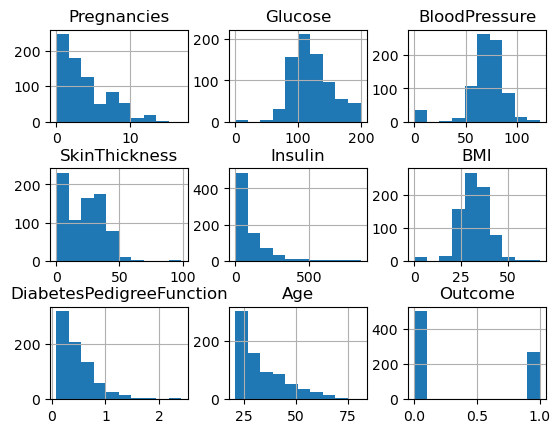

In [4]:
fig = plt.figure(figsize=(10,8))  
df.hist()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
 missing_rows = df.loc[df[col]==0].shape[0]
 print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [8]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [9]:
# imputing accordance with their distribution 
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

C:\Users\Abdul\AppData\Local\Temp\ipykernel_24472\2794754144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
C:\Users\Abdul\AppData\Local\Temp\ipykernel_24472\2794754144.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1000x800 with 0 Axes>

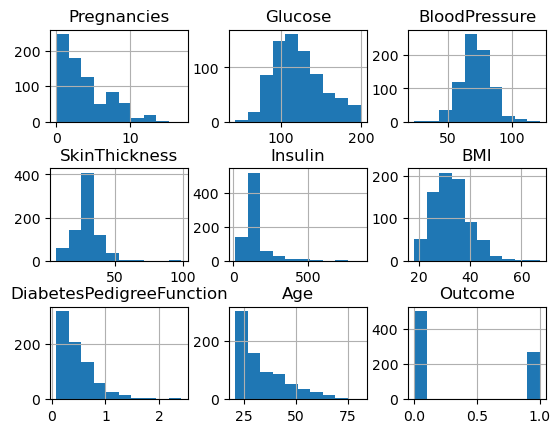

In [11]:
fig = plt.figure(figsize=(10,8))  
df.hist()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [12]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Split the data: 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 80% for training, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.highest_accuracy = 0 

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to {-1, 1} 
        y_ = np.where(y <= 0, -1, 1)

        # Training loop
        for epoch in range(self.epochs):
            total_loss = 0
            correct_predictions = 0
            
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.sign(linear_output)

                # Perceptron update rule
                if y_[idx] * linear_output <= 0:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]
                    total_loss += 1  # Misclassification loss (1 for each incorrect)

                if y_pred == y_[idx]:
                    correct_predictions += 1
            
            # Calculate accuracy 
            accuracy = correct_predictions / n_samples

            # Update highest accuracy
            if accuracy > self.highest_accuracy:
                self.highest_accuracy = accuracy

            # Print details every 50 epochs
            if (epoch + 1) % 50 == 0 or epoch == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}")

        # highest accuracy
        print(f"\nHighest Accuracy Reached During Training: {self.highest_accuracy:.4f}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


In [16]:

# Initialize the perceptron model
perceptron = Perceptron(learning_rate=0.001, epochs=1000)

# Train the model using the training data
perceptron.fit(X_train, y_train)

Epoch 1/1000, Loss: 153.0000, Accuracy: 0.6884
Epoch 50/1000, Loss: 142.0000, Accuracy: 0.7108
Epoch 100/1000, Loss: 140.0000, Accuracy: 0.7149
Epoch 150/1000, Loss: 129.0000, Accuracy: 0.7373
Epoch 200/1000, Loss: 147.0000, Accuracy: 0.7006
Epoch 250/1000, Loss: 138.0000, Accuracy: 0.7189
Epoch 300/1000, Loss: 140.0000, Accuracy: 0.7149
Epoch 350/1000, Loss: 142.0000, Accuracy: 0.7108
Epoch 400/1000, Loss: 132.0000, Accuracy: 0.7312
Epoch 450/1000, Loss: 147.0000, Accuracy: 0.7006
Epoch 500/1000, Loss: 143.0000, Accuracy: 0.7088
Epoch 550/1000, Loss: 146.0000, Accuracy: 0.7026
Epoch 600/1000, Loss: 139.0000, Accuracy: 0.7169
Epoch 650/1000, Loss: 139.0000, Accuracy: 0.7169
Epoch 700/1000, Loss: 144.0000, Accuracy: 0.7067
Epoch 750/1000, Loss: 138.0000, Accuracy: 0.7189
Epoch 800/1000, Loss: 143.0000, Accuracy: 0.7088
Epoch 850/1000, Loss: 143.0000, Accuracy: 0.7088
Epoch 900/1000, Loss: 147.0000, Accuracy: 0.7006
Epoch 950/1000, Loss: 144.0000, Accuracy: 0.7067
Epoch 1000/1000, Loss: 

Validation Accuracy: 0.59
Test Accuracy: 0.71
Confusion Matrix (Test Data):
[[75 24]
 [21 34]]
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        99
           1       0.59      0.62      0.60        55

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix (Test Data):
[[75 24]
 [21 34]]


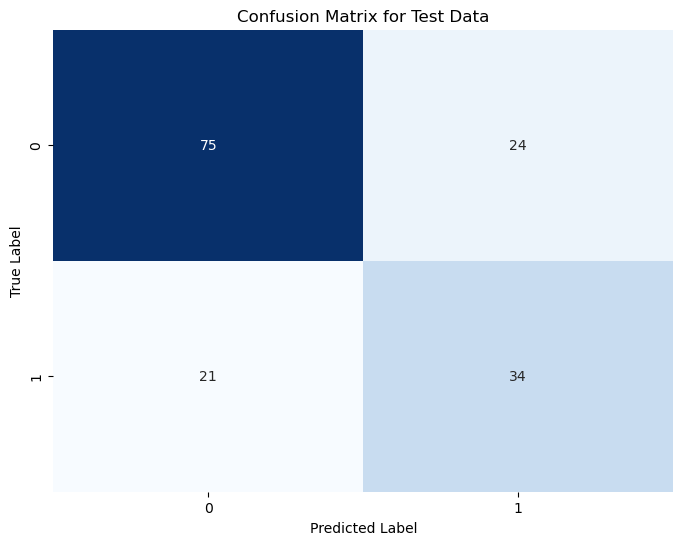

In [17]:
# Predict using validation set
y_val_pred = perceptron.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Predict using test set
y_test_pred = perceptron.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):")
print(conf_matrix)

# Detailed classification report
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Data')
plt.show()


Training Accuracy: 0.74
Validation Accuracy: 0.59
Test Accuracy: 0.71


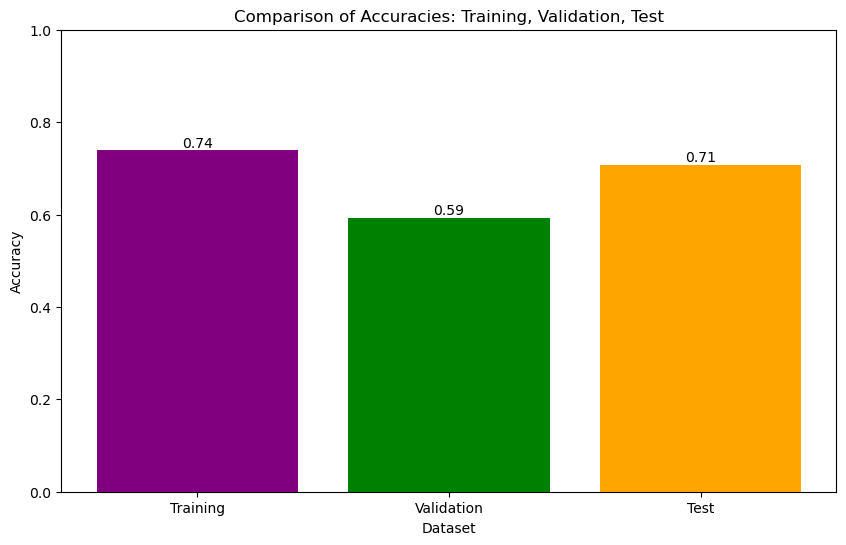

In [18]:
print(f'Training Accuracy: {perceptron.highest_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# labels
labels = [ 'Training', 'Validation', 'Test']
accuracies = [perceptron.highest_accuracy, val_accuracy, test_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracies, color=['purple', 'green', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.title('Comparison of Accuracies: Training, Validation, Test')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()
